In [30]:
import tensorflow as tf
from src.dataset import mfccs_dataset, NUHI_PATH

train_mfccs_ds, val_mfccs_ds, label_names, input_shape = mfccs_dataset(NUHI_PATH, 0.7, 4)

Found 130 files belonging to 2 classes.
Using 39 files for training.
Using 91 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (4, 4000)
Example label shape: (4,)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100 16
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)

===== MFCCs (num_spectrogram_bins, sample_rate, num_mfccs) ====
513 44100 12
513 44100 12

Before balancing
Queen: 59% (23), Noqueen: 41% (16)

After balancing
Queen: 50% (16), Noqueen: 50% (16)

 ==== MFCCs input shape ==== 
(12, 12, 1)


Epoch 1/80


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2500 - loss: 1.2020 - val_accuracy: 0.6374 - val_loss: 0.6889
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4583 - loss: 0.8043 - val_accuracy: 0.6044 - val_loss: 0.6918
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 0.6774 - val_accuracy: 0.6484 - val_loss: 0.6765
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6042 - loss: 0.7074 - val_accuracy: 0.6813 - val_loss: 0.6589
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6042 - loss: 0.6286 - val_accuracy: 0.6484 - val_loss: 0.6458
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8125 - loss: 0.5857 - val_accuracy: 0.6264 - val_loss: 0.6348
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.5693 - val_accuracy: 0.5604 - val_loss: 0.6268
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4583 - loss: 0.7820 - val_accuracy: 0.5824 - val_loss: 0.6198
Epoch 9/80


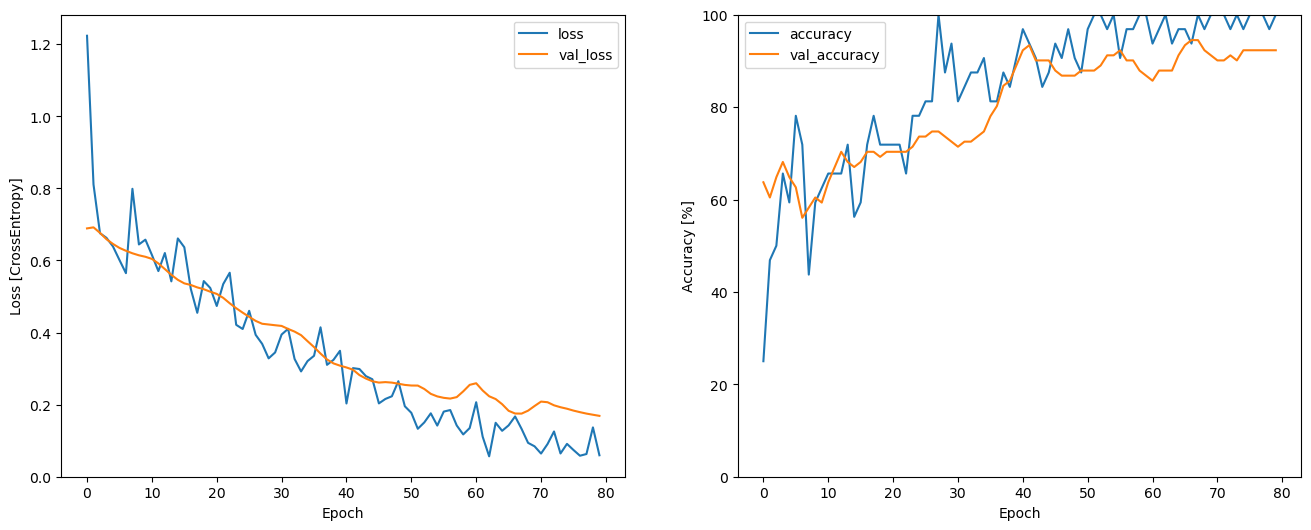

In [33]:
from src.model import get_conv_model_mini, callbacks
from src.plots import plot_history

LEARNING_RATE = 0.001

model = get_conv_model_mini(input_shape, len(label_names))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    train_mfccs_ds,
    validation_data=val_mfccs_ds,
    epochs=80,
    # callbacks=callbacks
)
plot_history(history)

In [32]:
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f}, Val. Loss: {history.history['val_loss'][-1]:.2f}, Val. Acc: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("Nu-Hive + MFCCs + Conv mini model       ", history)
model.save('models/nuhive_mfcc_conv.keras')

Nu-Hive + MFCCs + Conv mini model       :    Loss: 0.02, Acc: 1.00, Val. Loss: 0.09, Val. Acc: 0.95
